# 700_RQ3B


# _ Question Three: Does Location Impact Road Safety?_

## _ (B): Are drivers 'most Deprived' IMD Decile regions involved in the most road accidents?_ (1999 - 2014)


## Purpose
We continue to part (B) of our third research question in this notebook and finalise our analysis of whether and how IMD Decile of drivers involved in road accidents impacts road safety


### Notebook Contents:

* __1:__ Plotting IMD Decile of Driver

* __2:__ Mapping Road Accidents
     
* __3:__ Conclusion



## Datasets
* __Input__: 

* 300_analysis_Q1C_norm_all_IMD.pkl (All IMD_Decile's of drivers for each recorded UK Road Accident 1999 - 2014)


* 900_Q3B_final_prep_1.pkl (Fully prepared dataset 1 of UK Road Safety Data from 1999 - 2014, for RQ3(B))


* 900_Q3B_final_prep_2.pkl (Fully prepared dataset 2 of UK Road Safety Data from 1999 - 2014, for RQ3(B))


* __Output__: n/a

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

% matplotlib inline

## Define Some Matplotlib Configuration

Below we have included some formatting which we want each of our plots to follow.

This template has been taken from Barry's Valencia Results Notebooks.

In [3]:
sns.set_style("white")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, lines, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'

plt.rcParams['axes.titlesize'] = 40
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

plt.rcParams['axes.grid'] = True

plt.rcParams['lines.markersize'] = 30
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2

plt.rcParams['legend.fontsize'] = 20

Read in our datasets using pd.read_pickle method

In [4]:
norm_all_IMD = pd.read_pickle('../../data/analysis/300_analysis_Q1C_norm_all_IMD.pkl')
norm_all_IMD.shape

(10, 1)

In [5]:
Q3B_1 = pd.read_pickle('../../data/processed/900_Q3B_final_prep_1.pkl')
Q3B_1.shape

(1246275, 16)

In [6]:
Q3B_2= pd.read_pickle('../../data/processed/900_Q3B_final_prep_2.pkl')
Q3B_2.shape

(2133735, 16)

## 1.
### Plotting IMD Decile of Driver

Below we will create a heatmap of our driver IMD Decile data using our 'norm_all_IMD' dataset.This graph will display the total number of recorded road accidents from 1999 - 2014 for each IMD Decile of Driver.

We are plotting this to investigate whether certain IMD Deciles occur more/less than others within our data.

Text(0.5,0,'% of Accidents')

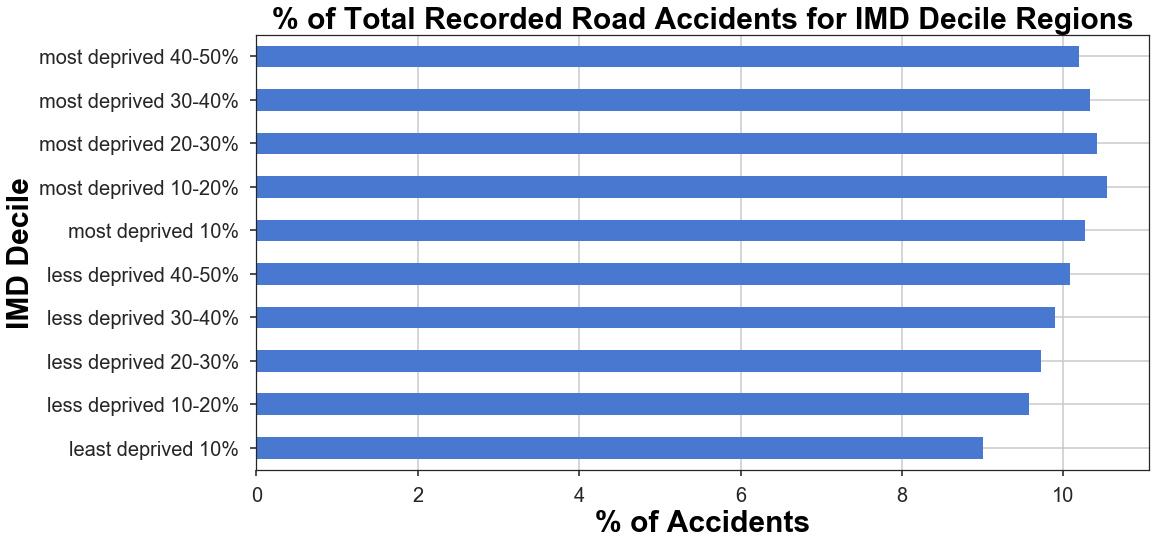

In [7]:
norm_all_IMD.plot(kind='barh', figsize = (16,8), legend=False) #create a bar chart
plt.title('% of Total Recorded Road Accidents for IMD Decile Regions', fontsize=30) #set graph title
plt.ylabel('IMD Decile') #set y axis label
plt.xlabel('% of Accidents') #set x axis label

We can see from the heatmap above that 'least deprived 10%' Driver IMD Decile regions have been in the least amount of recorded accidents. 

On the other hand, 'most deprived 10-20%' driver IMD Decile regions have been in the most amount of recorded accidents.

This would lead us to believe that drivers from more deprived areas are involved in more road accidents, however we must consider that this may be down to many other factors such as eg. cheaper/older cars being more popular in these deprived regions, or differing population sizes within regions.


## 2.
## Mapping Road Accidents

Below we will focus on creating a heat map using gmplot to plot local districts in which road accidents were recorded, from 1999 to 2014.

We are creating this plot to investigate whether local districts are evenly spaced throughout the UK, indicating population spread also. This will give us further insight into differing populations within each IMD Decile region.

To do this, we will be using the Latitude, Longitude and local district columns from our all_Q3B_1 and all_Q3B_2 datasets.


In [8]:
all_Q3B_1 = Q3B_1[['Longitude', 'Latitude', 'Local_Authority_(District)']].copy() #create a copy of original dataset containing only specified columns
all_Q3B_2 = Q3B_2[['Longitude', 'Latitude', 'Local_Authority_(District)']].copy()

We will now concatenate these two datasets into one larger dataset so that we can get the latitude and longitude of each recorded local district

In [9]:
All_df = pd.concat([all_Q3B_1, all_Q3B_2], axis=0)
All_df

,Longitude,Latitude,Local_Authority_(District)
8521268,-0.271752,51.715661,33
8521270,-0.239977,51.695136,33
8521271,-0.270037,51.715096,33
8521272,-0.270037,51.715096,33
8521274,-0.263233,51.711309,33
8521275,-0.227225,51.688200,33
8521276,-0.227225,51.688200,33
8521277,-0.227225,51.688200,33
8521278,-0.227225,51.688200,33
8521279,-0.375451,51.690074,33


Using the groupby function, we will get a count of the number of accidents which have occurred in each district and create a new column  named 'Count' to hold this data.

We will also get the mean latitude and longitude for all recorded accidents in each district as we currently have 3380010 rows, which is too many to plot. 

In [10]:
All_df = All_df.groupby('Local_Authority_(District)') \
       .agg({'Local_Authority_(District)':'size', 'Longitude':'mean', 'Latitude':'mean'}) \
       .rename(columns={'Local_Authority_(District)':'Count'}) \
       .reset_index()
    
All_df

,Local_Authority_(District),Count,Longitude,Latitude
0,1,30777,-0.154260,51.512147
1,2,11409,-0.145829,51.535936
2,3,13011,-0.108552,51.545300
3,4,16303,-0.068638,51.549999
4,5,17330,-0.041258,51.518008
5,6,16191,0.046619,51.474585
6,7,18454,-0.022213,51.452084
7,8,21482,-0.080185,51.481914
8,9,23680,-0.119787,51.460558
9,10,18732,-0.179585,51.451963


Now that we have concatenated our data in one dataframe, we will plot the average latitude and longitude for each district on a gmap. This will show us which districts within the UK have recorded road accidents from 1999 - 2014.

In [13]:
Longitude = All_df['Longitude'] #define latitude and longitude

Latitude = All_df['Latitude']

In [19]:
from gmplot import gmplot

# Place map
gmap = gmplot.GoogleMapPlotter(55.3781, -3.4360, 6)

# Scatter points
district_lats, district_longs = ([
    Latitude, Longitude
    ])
gmap.heatmap(district_lats, district_longs)

# Draw
gmap.draw("districts.html")

It is quite clear from this heat map "districts.html" that the UK districts with recorded road accidents from 1999 to 2014 are more concentrated in areas such as London, Liverpool and Glasgow, to name a few.

Perhaps this indicates a larger population within these hotspots, represented by a larger number of districts.

## 3.
# Conclusion

From our above graphs, we have found that 'least deprived 10%' Driver IMD Decile has been in the least amount of recorded accidents, while 'most deprived 10-20%' driver IMD Decile regions have been in the most amount of recorded accidents. This indicates that perhaps 'most deprived' driver IMD Decile regions are involved in more road accidents than 'least deprived' driver IMD Deciles. However, due to the population imbalances within 'IMD Decile' regions, we cannot conclusively say that this is the case.

Unfortunately we could not find information on the populations within each 'IMD Decile' region. However, we believe that future work into the differing population densities within each 'IMD Decile' would provide a clearer idea of whether drivers from 'most Deprived' IMD Decile areas involved in the most road accidents.